In [116]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from Moving_Average import moving_average

In [117]:
# Create a VideoCapture object and specify the video file path
video = cv2.VideoCapture('C:/Users/Phili\OneDrive - Danmarks Tekniske Universitet/Bachelorprojekt/Videoer/Same frequency/run2Frequency 1.9Hz/frequency1.9.mp4')

# Defining alpha region
alpha = 0.20

# Frame Intensities
Intensities = []

# Choose whether to display the video
display_video = False

# choose which region to view
region = "left"

# Check if the video file was successfully opened
if video.isOpened():
    while True:
        # Read frames from the video
        ret, frame = video.read()

        # If frames are successfully read
        if ret:
            # Get the dimensions of the frame
            height, width, _ = frame.shape

            # Calculate the start and end indices for cropping
            if region == "left":
                start_x = int(width - width *0.85)
                end_x = int(width / 2 - alpha * width / 2)
            if region == "middle":
                start_x = int(width / 2 - alpha * width / 2)
                end_x = int(width / 2 + alpha * width / 2)
            if region == "right":
                start_x = int(width / 2 + alpha * width / 2)
                end_x = int(width - width *0.20)
            # Crop the middle 20% of the frame
            cropped_frame = frame[:, start_x:end_x, :]

            # Convert the frame to grayscale
            gray_cropped_frame = cv2.cvtColor(cropped_frame, cv2.COLOR_BGR2GRAY)

            # Calculate the average intensity of the frame
            average_intensity = gray_cropped_frame.mean()

            # Append the average intensity to Intensities
            Intensities.append(average_intensity)

            # Display the frame
            if display_video:
                cv2.imshow('Video', gray_cropped_frame)

            # Exit the loop if 'q' is pressed
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
        else:
            # Break the loop if frames cannot be read
            break

    # Release the video object and close any open windows
    video.release()
    cv2.destroyAllWindows()
else:
    print("Failed to open the video file.")

# Last intensity
last_intensity = Intensities[-1]

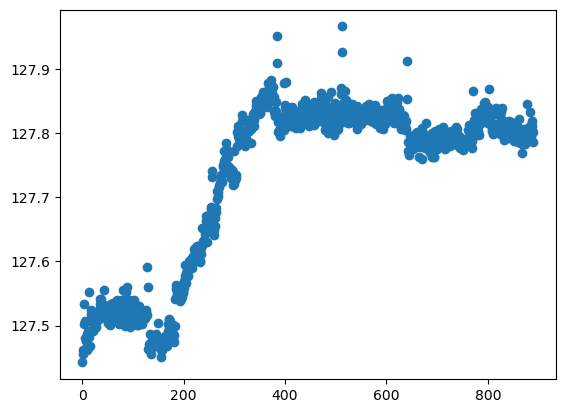

In [118]:
scatter_frames = np.arange(len(Intensities))
plt.scatter(scatter_frames, Intensities)
plt.show()

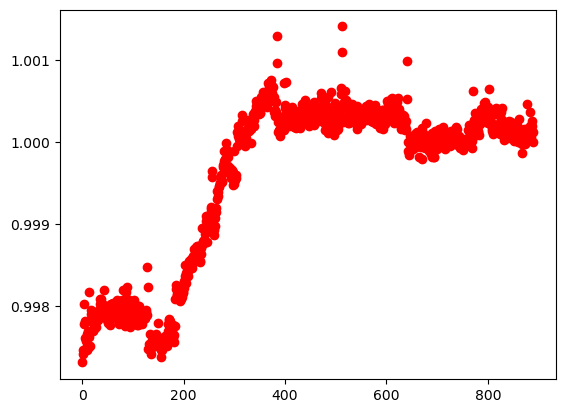

In [119]:
plt.scatter(scatter_frames, Intensities/last_intensity, color='red')
plt.show()

In [120]:
ma = moving_average(Intensities, 11)

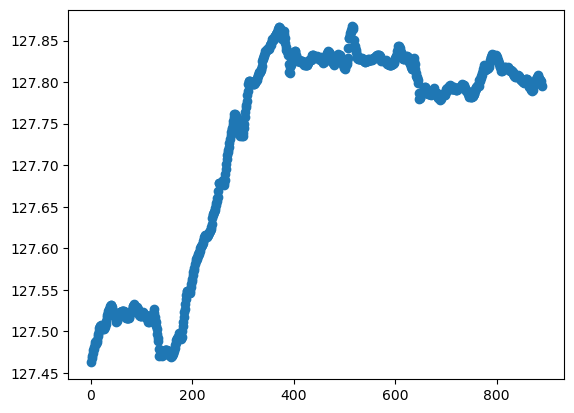

In [121]:
plt.scatter(scatter_frames, ma)
plt.show()

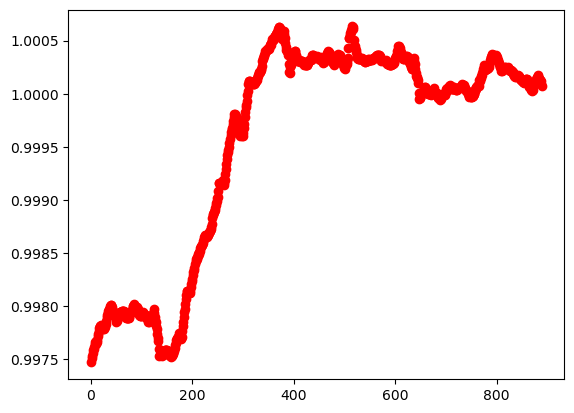

In [122]:
plt.scatter(scatter_frames, ma/last_intensity, color='red')
plt.show()